1. Using the same propagation model from the previous assignment, create a vector of a few hundred received signal phasors for each element of a moving two element receive array of isotropic radiators with separation distance d. Correlate the two vectors (the corrcoef function is useful here), and plot the correlation coefficient as a function of the element spacing. Overlay the analytical result from the lecture notes.

Text(0, 0.5, 'Correlation Coefficient')

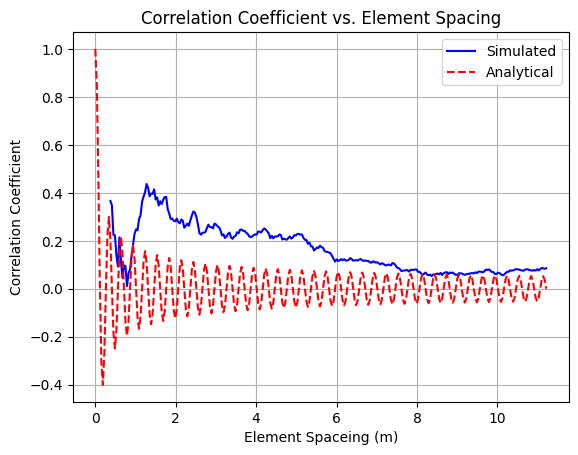

In [23]:
# Scatterer multipath propagation model
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j0

# parameters
f = 1e9
c0 = 3e8
lam = c0/f
k = 2*np.pi/lam
eta = 377
Gr = 10**(1/10)

## Using the same propagation model from the previous assignment ##

# number of points to simulate
points = 300

# transmitter location
x_t = 0
y_t = 0

# locations for receiver
x_r = np.linspace(-10, 10, points)
y_r = np.zeros(points)

# scatter points
x_s = np.random.uniform(-10, 10, points)
y_s = np.random.uniform(-10, 10, points)

# create a vector of a few hundred received signal phasors 
# for each element of a moving two element receive array of 
# isotropic radiators with separation distance d

# receiver model
M = 2                                           # number of elements
d = np.array([i*lam/8 for i in range(points)])  # element spacing
E = np.zeros([points, M], dtype=complex)        # received field
ref_coef = -1                                   # reflection coefficient

for m in range(0,points):

    # calculate the fields
    for n in range(0,M):

        # element positions within the array
        x_r_e = x_r[m] + n*d[m]    
        
        # distance between scatterer and receiver
        delta_r = np.sqrt((x_t - x_s[m])**2 + (y_t - y_s[m])**2) \
                - np.sqrt((x_s[m] - x_r_e)**2 + (y_s[m] - y_r[m])**2)
        
        # received field
        E[m, n] = 1+ref_coef*np.exp(-1j*k*delta_r)

## Correlate the two vectors ##
R = np.array([
    np.corrcoef(E[:m+1, 0].real, E[:m+1, 1].real)[0, 1]
    for m in range(10, points)  # start after a few samples for stability
])
R = np.concatenate((np.full(10, np.nan), R))

# analytical solution
rho_analytic = j0(2 * np.pi * d / lam)

## plot the correlation coefficient as a function of the element spacing. ##
plt.plot(d, R, 'b-', label='Simulated')
plt.plot(d, rho_analytic, 'r--', label='Analytical')
plt.grid()
plt.legend()
plt.title('Correlation Coefficient vs. Element Spacing')
plt.xlabel('Element Spaceing (m)')
plt.ylabel('Correlation Coefficient')

2. Derive simplified expressions for the MIMO log-det channel capacity formula for (a) SISO, (b) receive diversity, and (c) transmit diversity